In [88]:
# Importing Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")


In [30]:
## Load Dataset
df = pd.read_csv('weatherAUS.csv')
df.head()
df.shape


(142193, 24)

## Data Preprocessing

### Checking null values

In [31]:
## Checking null values
df.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

### Dropping columns which have more than 20% null values

In [32]:
### Dropping columns which have more than 20% null values as they will impact the accuracy.
# Also removing date as it wont have any impact on the prediction
df.drop(['Date','Evaporation', 'Sunshine','Cloud9am','Cloud3pm'], axis=1, inplace=True)
df.shape

(142193, 19)

In [33]:
df_clean = df.dropna()
df_clean.shape,df_clean.isna().sum()

((112925, 19),
 Location         0
 MinTemp          0
 MaxTemp          0
 Rainfall         0
 WindGustDir      0
 WindGustSpeed    0
 WindDir9am       0
 WindDir3pm       0
 WindSpeed9am     0
 WindSpeed3pm     0
 Humidity9am      0
 Humidity3pm      0
 Pressure9am      0
 Pressure3pm      0
 Temp9am          0
 Temp3pm          0
 RainToday        0
 RISK_MM          0
 RainTomorrow     0
 dtype: int64)

In [34]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112925 entries, 0 to 142192
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       112925 non-null  object 
 1   MinTemp        112925 non-null  float64
 2   MaxTemp        112925 non-null  float64
 3   Rainfall       112925 non-null  float64
 4   WindGustDir    112925 non-null  object 
 5   WindGustSpeed  112925 non-null  float64
 6   WindDir9am     112925 non-null  object 
 7   WindDir3pm     112925 non-null  object 
 8   WindSpeed9am   112925 non-null  float64
 9   WindSpeed3pm   112925 non-null  float64
 10  Humidity9am    112925 non-null  float64
 11  Humidity3pm    112925 non-null  float64
 12  Pressure9am    112925 non-null  float64
 13  Pressure3pm    112925 non-null  float64
 14  Temp9am        112925 non-null  float64
 15  Temp3pm        112925 non-null  float64
 16  RainToday      112925 non-null  object 
 17  RISK_MM        112925 non-nul

In [35]:
df_clean.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,0.0,No
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,0.0,No
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,0.0,No
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,1.0,No
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,0.2,No


### Converting categorical data in to numeric data

In [38]:
df_clean['Location'] = pd.factorize(df_clean['Location'])[0]
df_clean['WindGustDir'] = pd.factorize(df_clean['WindGustDir'])[0]
df_clean['WindDir9am'] = pd.factorize(df_clean['WindDir9am'])[0]
df_clean['WindDir3pm'] = pd.factorize(df_clean['WindDir3pm'])[0]
df_clean['RainToday'] = pd.factorize(df_clean['RainToday'])[0]
df_clean['RainTomorrow'] = pd.factorize(df_clean['RainTomorrow'])[0]


In [39]:
df_clean.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,0,13.4,22.9,0.6,0,44.0,0,0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0.0,0
1,0,7.4,25.1,0.0,1,44.0,1,1,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0.0,0
2,0,12.9,25.7,0.0,2,46.0,0,1,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0.0,0
3,0,9.2,28.0,0.0,3,24.0,2,2,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,1.0,0
4,0,17.5,32.3,1.0,0,41.0,3,3,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0.2,0


In [40]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112925 entries, 0 to 142192
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       112925 non-null  int64  
 1   MinTemp        112925 non-null  float64
 2   MaxTemp        112925 non-null  float64
 3   Rainfall       112925 non-null  float64
 4   WindGustDir    112925 non-null  int64  
 5   WindGustSpeed  112925 non-null  float64
 6   WindDir9am     112925 non-null  int64  
 7   WindDir3pm     112925 non-null  int64  
 8   WindSpeed9am   112925 non-null  float64
 9   WindSpeed3pm   112925 non-null  float64
 10  Humidity9am    112925 non-null  float64
 11  Humidity3pm    112925 non-null  float64
 12  Pressure9am    112925 non-null  float64
 13  Pressure3pm    112925 non-null  float64
 14  Temp9am        112925 non-null  float64
 15  Temp3pm        112925 non-null  float64
 16  RainToday      112925 non-null  int64  
 17  RISK_MM        112925 non-nul

## Prediction model using Decision Tree

### Dividing data in to descriptive and target features

In [41]:
## Making Descriptive and Target Features
descriptive_features = df_clean.iloc[:,:-1]
descriptive_features


,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,0,13.4,22.9,0.6,0,44.0,0,0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0.0
1,0,7.4,25.1,0.0,1,44.0,1,1,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0.0
2,0,12.9,25.7,0.0,2,46.0,0,1,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0.0
3,0,9.2,28.0,0.0,3,24.0,2,2,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,1.0
4,0,17.5,32.3,1.0,0,41.0,3,3,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,43,3.5,21.8,0.0,14,31.0,11,2,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,0,0.0
142189,43,2.8,23.4,0.0,14,31.0,2,7,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0,0.0
142190,43,3.6,25.3,0.0,4,22.0,2,12,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0,0.0
142191,43,5.4,26.9,0.0,5,37.0,2,0,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0,0.0


In [44]:
target_feature = df_clean.iloc[:,-1:]
target_feature.head(10)

,RainTomorrow
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,1
9,0


### Testing by dividing data into training and testing sub datasets.
80% training and 20% test dataset

In [56]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(descriptive_features,target_feature,test_size=0.2,random_state=0)

In [70]:
X_train.shape,y_test.shape,X_test.shape,y_test.shape

((90340, 18), (22585, 1), (22585, 18), (22585, 1))

### Random Forest Classifier

Training Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=500,criterion='entropy', random_state=1)
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=1)

Predicting using model

In [ ]:
y_pred = classifier.predict(X_test)

Measuring accuracy score

In [71]:

from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test,y_pred)
print('Accuracy score of prediction: ',acc_score*100,'%')


Accuracy score of prediction:  100.0 %


### 10fold Cross validation 

In [60]:
model = RandomForestClassifier(n_estimators=500,criterion='entropy', random_state=1)
cv = cross_validate(model, descriptive_features, target_feature, cv=10,scoring='f1')


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0


### Checking important features of the classifier

Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 1.00000


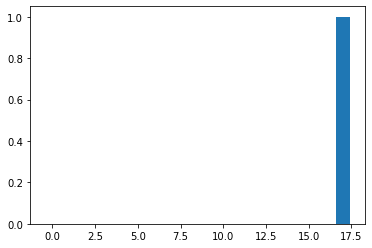

In [87]:
importance_RF = classifier.feature_importances_
importance_RF
# summarize feature importance
for i,v in enumerate(importance_RF):
    print('Feature: %0d, Score: %.5f' % (i+1,v))
# plot feature importance
plt.bar([x for x in range(len(importance_RF))], importance_RF)
plt.show()

### Checking F1-score

In [72]:
print('f1-score for every fold: ',cv['test_score'])
print('Average of f1-score is: ',cv['test_score'].mean())

f1-score for every fold:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Average of f1-score is:  1.0


### Results Intepretation 
The f1-score along with accuracy stands out to be perfect i.e. 1, by further analysis of important features, it is found that the prediciton of rain to happen tomorrow heavliy depends on 1 feature only i.e. Risk Factor **RISK_MM**, for risk factor less than or equal to 1, there is no chance of rain, whereas when risk factor is **greater than 1, the rain happens.**

### Cross Checking accuracy with Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)
predicted_values = classifier.predict(X_test)
predicted_values
## Measure Accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,predicted_values)
score

1.0